In [1]:
# Graficas a partir de los datos obtenidos de 
# la base de datos TraitsQTLs_Genetica.
# Bioinformática. Arturo García Cerrillo

#Importando librerías
import pandas as pd
import seaborn as sns 
import numpy as np
import mysql.connector
import math
import matplotlib.pyplot as plt

In [2]:
# Conexión a MySQL desde Python
# El nombre de la base de datos es TraitsQTLs_Genetica

mydb = mysql.connector.connect(
	host="localhost",
	user="root",
	passwd="genoma123",
	port = '3306',
	database = "TraitsQTLs_Genetica"
	)

mycursor = mydb.cursor()

In [3]:
# Mostramos tablas de la Base de Datos
mycursor.execute("SHOW TABLES")
for x in mycursor:
		print(x)

('DatosGenerales',)
('Mediciones',)


In [4]:
#Obtenemos los datos a graficar desde MySQL
Fetching = "SELECT tipo,medida,persona_id FROM Mediciones WHERE tipo LIKE 'brazo' OR tipo LIKE 'frente'"
mycursor.execute(Fetching)
Pigmentacion = []
Pigmentacion = mycursor.fetchall()

#Creamos lista de listas
Pigmentacion = [list(i) for i in Pigmentacion]

In [5]:
# Creamos un data frame con la lista creada
Data_frame = pd.DataFrame(Pigmentacion)
Data_frame.columns = ['Tipo', 'Pigmentacion', 'No. de individuo']
Data_frame

,Tipo,Pigmentacion,No. de individuo
0,frente,39.72,1
1,frente,41.69,1
2,frente,41.46,1
3,frente,41.54,1
4,frente,40.77,1
...,...,...,...
305,brazo,37.13,31
306,brazo,37.34,31
307,brazo,36.92,31
308,brazo,37.34,31


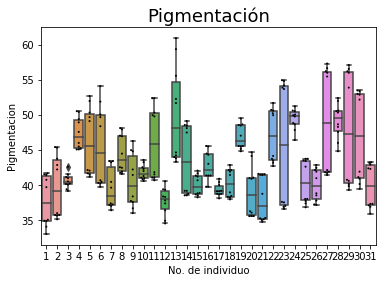

In [19]:
# Graficamos el Boxplot con uso del modulo seaborn

#Boxplots
ax = sns.boxplot(x="No. de individuo", y="Pigmentacion", data=Data_frame)
plt.title('Pigmentación',fontsize="18")

#Añadiendo las observaciones como puntos negros
ax = sns.swarmplot(x="No. de individuo", y="Pigmentacion", data=Data_frame, s=2, color="black")

# Cada boxplot muestra las observaciones de la pigmentacion de cada individuo


In [6]:
# Ahora graficaremos curvas de densidad para las mediciones
# en altura, calzado, y presiones diastólica y sistólica

#Altura
#Obtenemos los datos a graficar desde MySQL
Fetching_Altura = "SELECT medida,persona_id FROM Mediciones WHERE tipo LIKE 'altura'"
mycursor.execute(Fetching_Altura)
Altura_QTLs = []
Altura_QTLs = mycursor.fetchall()
Altura_QTLs = [list(i) for i in Altura_QTLs]

Altura_df = pd.DataFrame(Altura_QTLs)
Altura_df.columns = ['Altura', 'No de individuo']
Altura_df

,Altura,No de individuo
0,1.520,1
1,1.720,2
2,1.560,3
3,1.665,4
4,1.710,5
5,1.500,6
6,1.580,7
7,1.765,8
8,1.680,9
9,1.712,10


Text(0.5, 1.0, 'Curva de densidad de la altura')

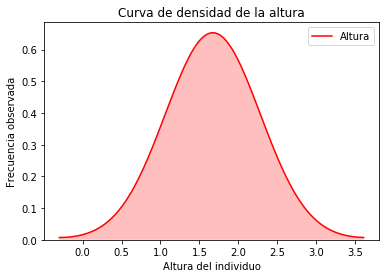

In [7]:
#Density plot para altura
sns.kdeplot(Altura_df['Altura'], shade=True, bw=.6, color="red")
plt.xlabel('Altura del individuo')
plt.ylabel('Frecuencia observada')
plt.title('Curva de densidad de la altura')

In [8]:
#Calzado
#Obtenemos los datos a graficar desde MySQL
Fetching_Cal = "SELECT medida,persona_id FROM Mediciones WHERE tipo LIKE 'calzado'"
mycursor.execute(Fetching_Cal)
Cal_QTLs = []
Cal_QTLs = mycursor.fetchall()
Cal_QTLs = [list(i) for i in Cal_QTLs]

Cal_df = pd.DataFrame(Cal_QTLs)
Cal_df.columns = ['Calzado', 'No de individuo']
Cal_df

,Calzado,No de individuo
0,23.0,1
1,24.5,2
2,24.0,3
3,23.5,4
4,25.7,5
5,23.0,6
6,23.5,7
7,26.5,8
8,26.0,9
9,26.0,10


Text(0.5, 1.0, 'Curva de densidad del calzado')

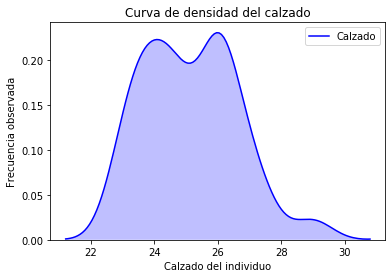

In [9]:
#Density plot para altura
sns.kdeplot(Cal_df['Calzado'], shade=True, bw=.6, color="blue")
plt.xlabel('Calzado del individuo')
plt.ylabel('Frecuencia observada')
plt.title('Curva de densidad del calzado')

In [10]:
#Presiones sistolica y diastolica

#Sistolica
#Obtenemos los datos a graficar desde MySQL
Fetching_Prs = "SELECT medida,persona_id FROM Mediciones WHERE tipo LIKE 'Presion_sistole'"
mycursor.execute(Fetching_Prs)
Prs_QTLs = []
Prs_QTLs = mycursor.fetchall()
Prs_QTLs = [list(i) for i in Prs_QTLs]

Prs_df = pd.DataFrame(Prs_QTLs)
Prs_df.columns = ['Presion_Sistolica', 'No de individuo']
Prs_df

,Presion_Sistolica,No de individuo
0,118.0,1
1,119.0,2
2,103.0,3
3,114.0,4
4,90.0,5
5,102.0,6
6,93.0,7
7,106.0,8
8,103.0,9
9,129.0,10


In [11]:
#Diastolica
#Obtenemos los datos a graficar desde MySQL
Fetching_Prd = "SELECT medida,persona_id FROM Mediciones WHERE tipo LIKE 'Presion_diastole'"
mycursor.execute(Fetching_Prd)
Prd_QTLs = []
Prd_QTLs = mycursor.fetchall()
Prd_QTLs = [list(i) for i in Prd_QTLs]

Prd_df = pd.DataFrame(Prd_QTLs)
Prd_df.columns = ['Presion_Diastolica', 'No de individuo']
Prd_df

,Presion_Diastolica,No de individuo
0,86.0,1
1,78.0,2
2,67.0,3
3,85.0,4
4,42.0,5
5,68.0,6
6,58.0,7
7,51.0,8
8,66.0,9
9,91.0,10


Text(0.5, 1.0, 'Curva de densidad del calzado')

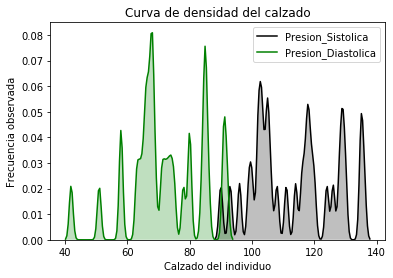

In [12]:
#Density plot para las presiones
Plot_Sis = sns.kdeplot(Prs_df['Presion_Sistolica'], shade=True, bw=.6, color="black")
Plot_Dia = sns.kdeplot(Prd_df['Presion_Diastolica'], shade=True, bw=.6, color="green")

plt.xlabel('Calzado del individuo')
plt.ylabel('Frecuencia observada')
plt.title('Curva de densidad del calzado')